### Spaceship Titanic with fastai

Competition [Link](https://www.kaggle.com/competitions/spaceship-titanic/overview)

In [32]:
#|default_exp app

In [33]:
#The Following cell of code is used everytime FASTAI library is used.
#They tell the notebook to reload any changes made to any libraries used.
#They also ensure that any graphs are plotted are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [94]:
from fastai.tabular.all import *
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import dtreeviz

In [35]:
#| export
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
creds = ''

In [36]:
#| export
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [37]:
#| export
path = Path('spaceship-titanic')

In [38]:
#| export
if not iskaggle and not path.exists():
    import zipfile, kaggle
    kaggle.api.competition_download_cli(str(path))    
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [39]:
#| export
if iskaggle:
    path = Path('../input/spaceship-titanic')
    ! pip install -q dataset

In [40]:
#| export
df = pd.read_csv(path/'train.csv', low_memory=False)
test_df = pd.read_csv(path/'test.csv', low_memory=False)
sample_df = pd.read_csv(path/'sample_submission.csv', low_memory=False)

In [41]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [43]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [44]:
#| export
dep_var = 'Transported'

In [45]:
df['Destination'].sample

<bound method NDFrame.sample of 0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object>

In [46]:
#| export
procs = [Categorify, FillMissing]

In [74]:
#| export
train, valid = train_test_split(df, test_size=.2, random_state=42)

In [72]:
len(train), len(valid)

(6954, 1739)

In [73]:
#| export
train_idx = np.array(train.index)
valid_idx = np.array(valid.index)
train_idx, valid_idx

(array([2333, 2589, 8302, ..., 5390,  860, 7270]),
 array([ 304, 2697, 8424, ..., 1302, 5934, 6093]))

In [78]:
u, c = np.unique(valid_idx, return_counts=True)
dup = u[c > 1]
dup

array([], dtype=int64)

In [80]:
#| export
splits = (list(train_idx), list(valid_idx))

In [79]:
#| export
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [81]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [82]:
len(to.train), len(to.valid)

(6954, 1739)

In [83]:
save_pickle(path/'space_titan_to.pkl', to)

In [85]:
to = load_pickle(path/'space_titan_to.pkl')

In [87]:
to.items.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na
2333,2334,1,1,0,3,28.0,1,0.0,55.0,0.0,656.0,0.0,5072,0,1,1,1,1,1,1
2589,2590,1,1,3953,3,17.0,1,0.0,1195.0,31.0,0.0,0.0,2014,0,1,1,1,1,1,1
8302,8303,2,2,933,1,28.0,1,0.0,0.0,0.0,0.0,0.0,427,1,1,1,1,1,1,1
8177,8178,3,1,3334,3,20.0,1,0.0,2.0,289.0,976.0,0.0,7876,1,1,2,1,1,1,1
500,501,2,2,720,1,36.0,1,0.0,0.0,0.0,0.0,0.0,37,1,1,1,1,1,1,1


In [91]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [93]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

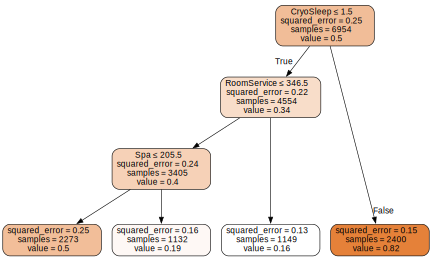

In [96]:
draw_tree(m, xs, size=6, leaves_parallel=True, precision=2)